In [1]:
# Automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import sys
sys.path.append("../../FastAi")
sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')
print(sys.path)

['', '/home/ros/anaconda3/envs/fastai/lib/python36.zip', '/home/ros/anaconda3/envs/fastai/lib/python3.6', '/home/ros/anaconda3/envs/fastai/lib/python3.6/lib-dynload', '/home/ros/.local/lib/python3.6/site-packages', '/home/ros/anaconda3/envs/fastai/lib/python3.6/site-packages', '/home/ros/.local/lib/python3.6/site-packages/IPython/extensions', '/home/ros/.ipython', '../../FastAi', '../../FastAi']


In [5]:
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

# TODO
> Refactor the methods 

# Downloading the images

Downloading the images using a program from https://github.com/hardikvasa/google-images-download and running it through bash scripting locally in the notebook. More possible configurations, such as multiple searchwords, different combinations, etc., but this is enough for now. 

To run this method:
> Using pip
> <div class="alert alert-block alert-info">
> \$ pip install google_images_download
</div> <br>
> Manually using CLI
> <div class="alert alert-block alert-info">
> \$ git clone https://github.com/hardikvasa/google-images-download.git <br>
> \$ cd google-images-download && sudo python setup.py install
> </div> <br>  
> Manually using UI
> <div class="alert alert-block alert-info">
> Go to the repo on github ==> Click on *Clone or Download* ==> Click on *Download ZIP* and save it on your local disk. </div>

<div class="alert alert-block alert-warning">
**NOTE** To download > 100 images, please see GitHub 
</div>

### The specified searchwords will be the classes, which in this case will be *female_face* and *male_face* 

In [ ]:
import os

def download_pictures(searchword, form="jpg", lim=100, directory="data/"):
    ! googleimagesdownload --keywords $searchword --format $form --limit $lim --output_directory $directory --chromedriver "../../../../Downloads/chromedriver" 
    src_path = directory + searchword
    dst_train_path = directory + "train/"
    dst_valid_path = directory + "valid/"
    counter = 1
    if not os.path.isdir(dst_train_path + searchword and dst_valid_path + searchword):
        train_search_folder = dst_train_path + searchword
        valid_search_folder = dst_valid_path + searchword
        print(train_search_folder)
        ! mkdir $train_search_folder
        ! mkdir $valid_search_folder
    for file in os.listdir(src_path):
        src = src_path + "/" + file
        dst_end = searchword + "/" + searchword + "." + str(counter) + "." + form
        train_ratio = lim*0.7 
        if(counter <= train_ratio):
            dst = dst_train_path + dst_end
        else:
            dst = dst_valid_path + dst_end
        os.rename(src, dst)
        counter = counter + 1
    delete_dir = directory + searchword
    ! rm -rf $delete_dir

In [ ]:
download_pictures("Female_face", lim=1000);
download_pictures("Male_face", lim=1000);
download_pictures("Image", lim=1000);

# Deep Learning

Utilizing a resizing method from FastAi - includes augmentation (side_on) and zooming 
    - Have the possibility of speeding up the training (smaller pictures) in the start
    - bs = 64 is usually preferred until Cuda-Out-Of-Memory Exception 

In [86]:
import os 
PATH = "data/"
os.listdir(PATH)

['models', 'v', 'train', 't', 'tmp', 'valid']

In [87]:
train_path = "train/"
valid_path = "valid/"
print(os.listdir(PATH + train_path))
print(os.listdir(PATH + valid_path))

['Female_face', 'Image', 'Male_face']
['Female_face', 'Image', 'Male_face']


Possible to get a nicer output of the items in directories? 

In [88]:
class1_path = "Female_face/"
class2_path = "Image/"
class3_path = "Male_face/"
print("Training folder: ")
print("Class1: " , os.listdir(PATH + train_path + class1_path)[:2])
print("Class2: " , os.listdir(PATH + train_path + class2_path)[:2])
print("Class3: " , os.listdir(PATH + train_path + class3_path)[:2])

print("Validation folder: ")
print("Class1: " , os.listdir(PATH + valid_path + class1_path)[:2])
print("Class2: " , os.listdir(PATH + valid_path + class2_path)[:2])
print("Class3: " , os.listdir(PATH + valid_path + class3_path)[:2])

Training folder: 
Class1:  ['Female_face.518.jpg', 'Female_face.405.jpg']
Class2:  ['Image.567.jpg', 'Image.175.jpg']
Class3:  ['Male_face.616.jpg', 'Male_face.456.jpg']
Validation folder: 
Class1:  ['Female_face.755.jpg', 'Female_face.788.jpg']
Class2:  ['Image.815.jpg', 'Image.761.jpg']
Class3:  ['Male_face.90.jpg', 'Male_face.98.jpg']


In [89]:
files = os.listdir(f'{PATH}{train_path}{class2_path}')[:1]
files

['Image.567.jpg']

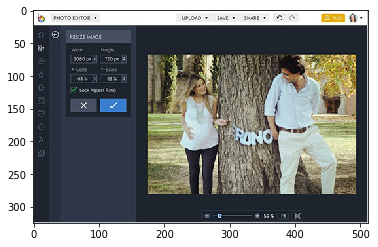

In [90]:
img = plt.imread(f'{PATH}{train_path}{class2_path}{files[0]}')
plt.imshow(img)

In [158]:
img.shape

(325, 512, 3)

In [159]:
img[:4, :4]

array([[[193, 192, 210],
        [200, 204, 215],
        [190, 202, 202],
        [189, 205, 202]],

       [[205, 202, 221],
        [244, 246, 255],
        [249, 254, 255],
        [245, 253, 255]],

       [[194, 194, 206],
        [254, 254, 255],
        [255, 254, 255],
        [255, 254, 255]],

       [[191, 200, 199],
        [248, 252, 251],
        [255, 254, 252],
        [255, 251, 248]]], dtype=uint8)

## Uncomment if needing to resize images 

> <div class="alert alert-block alert-warning">
Possible problems with it storing them in *tmp* folder
</div>

In [ ]:
from sklearn import metrics 

def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs)
    return data if sz > 300 else data.resize(340, 'tmp');

In [91]:
arch = resnet34
sz = 299 # One of two standards for ImageNet (224)
bs = 64 # 64 resulted in cuda-out-of-memory-error

In [161]:
learn = ConvLearner.pretrained(arch, data, ps=0.5)
learn.fit(1e-3, 1)

  0%|          | 0/123 [00:00<?, ?it/s]


OSError: No such file or directory: data/train/Image/Image.288.jpg

In [92]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)
learn = ConvLearner.pretrained(arch, data, ps=0.4)
learn.fit(1e-3, 1)

epoch      trn_loss   val_loss   accuracy                 
    0      1.205303   0.809846   0.678161  



[array([0.80985]), 0.6781609197686002]

## Problems because of non-valid image types

> <div class="alert alert-block alert-info">
Can use module *imghdr* to verify image types
</div>

In [ ]:
import imghdr
imghdr.what(f'{PATH}{train_path}{class3_path}{files[0]}')

### Need to loop through datasets to remove invalid images 

> <div class="alert alert-block alert-info">
But first, interesting to see how much data we will be losing
</div>

In [ ]:
class1_train = PATH + train_path + class1_path
class2_train = PATH + train_path + class2_path
class3_train = PATH + train_path + class3_path
class1_valid = PATH + valid_path + class1_path
class2_valid = PATH + valid_path + class2_path
class3_valid = PATH + valid_path + class3_path

In [ ]:
print(class1_path[:-1] + " training files: " , len(os.listdir(PATH + train_path + class1_path)))
print(class2_path[:-1] + " training files: " , len(os.listdir(PATH + train_path + class2_path)))
print(class1_path[:-1] + " validation files: " , len(os.listdir(PATH + valid_path + class1_path)))
print(class2_path[:-1] + " validation files: " , len(os.listdir(PATH + valid_path + class2_path)))

In [ ]:
file_paths = [class1_train, 
              class2_train,
              class3_train,
              class1_valid, 
              class2_valid,
            class3_valid]
for path in file_paths:
    for files in os.listdir(path):
        if imghdr.what(path + files) != 'jpeg':
            print("Deleting " + files + " in folder " + path + ", should be " + str(imghdr.what(path+files)))
            os.remove(path + files);

In [ ]:
print(class1_path[:-1] + " training files: " , len(os.listdir(PATH + train_path + class1_path)))
print(class2_path[:-1] + " training files: " , len(os.listdir(PATH + train_path + class2_path)))
print(class3_path[:-1] + " training files: " , len(os.listdir(PATH + train_path + class3_path)))
print(class1_path[:-1] + " validation files: " , len(os.listdir(PATH + valid_path + class1_path)))
print(class2_path[:-1] + " validation files: " , len(os.listdir(PATH + valid_path + class2_path)))
print(class3_path[:-1] + " validation files: " , len(os.listdir(PATH + valid_path + class3_path)))

### NOTE: Tried to switch image type from *None* to *JPEG* 
In order to minimize data loss

## New data set, so new training

In [96]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)
learn = ConvLearner.pretrained(arch, data, ps=0.1)

In [97]:
learn.fit(1e-2, 1)

 10%|▉         | 3/31 [00:05<00:47,  1.71s/it, loss=1.17]
epoch      trn_loss   val_loss   accuracy                  
    0      0.737563   0.46329    0.823755  



[array([0.46329]), 0.8237547892720306]

In [98]:
learn.fit(1e-2, 2, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.558502   0.44779    0.812261  
    1      0.534894   0.434102   0.823755                  



[array([0.4341]), 0.8237547892720306]

# Locate optimal learning rate

In [99]:
learn.lr_find()

 97%|█████████▋| 30/31 [00:32<00:01,  1.08s/it, loss=2.88] 

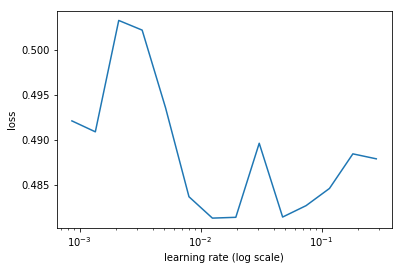

In [100]:
learn.sched.plot()

In [101]:
print(arch)

<function resnet34 at 0x7fc1df8b8c80>


In [102]:
data.classes

['Female_face', 'Image', 'Male_face']

## Optimal learning rate is approximately 1e-3

In [103]:
#learn.unfreeze()
#lr=np.array([1e-6,1e-5,1e-4])
lr = 1e-2

In [104]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

  0%|          | 0/31 [00:00<?, ?it/s]
epoch      trn_loss   val_loss   accuracy                  
    0      0.524239   0.422124   0.833333  
    1      0.486387   0.426675   0.829502                  
    2      0.46279    0.419786   0.840996                  
    3      0.452874   0.411056   0.827586                  
    4      0.436558   0.384613   0.831418                  
    5      0.406291   0.379892   0.833333                  
    6      0.385877   0.375825   0.83908                   



[array([0.37582]), 0.8390804597701149]

In [105]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds), 0)

accuracy_np(probs, y)

0.8812260536398467

In [106]:
learn.save("Resnet34_multiclass")

In [22]:
learn.load("Resnext50")

In [23]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds), 0)

accuracy_np(probs, y)

0.8122605363984674

## Data Augmentation
When training for multiple epochs, the model will start overfitting, which basically means the model is learning to recognizing specific images in the training set, rather than generalizing such that it is relevant for other images than just the ones in the training set. 

One quick fix is to effectively create more data, through data augmentation. This refers to randomly changing the images in ways that shouldn't impact their interpretation, such as horizontal flipping, zooming, and rotating.

In [81]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [ ]:
ims = np.stack([get_augs() for i in range(6)])

In [ ]:
plots(ims, rows=2)

# NOTE: Overfitting

### When *validation loss* >> *training* 

> <div class="alert alert-block alert-info">
Data Augmentation, Increase dropout, unfreeze and use differential learning rates
</div>

## Not very good results: 80% accuracy

### Trying to add differential dropout, and longer training 

In [ ]:
#ps=[0.1, 0.3, 0.5]
ps = 0.5

In [ ]:
#learn = ConvLearner.pretrained(arch, data, ps=ps)
#learn.unfreeze()
learn.fit(1e-4, 3, cycle_len=1, cycle_mult=2)

In [ ]:
learn.lr_find()

In [ ]:
learn.sched.plot()

In [ ]:
lr=np.array([1e-6,1e-5,1e-4])

In [ ]:
#learn.unfreeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

In [ ]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds), 0)

accuracy_np(probs, y)

In [ ]:
learn.save("Resnext50")

In [ ]:
learn.load("Resnext50")

## Overfitting --> Increasing dropout 

In [ ]:
ps=[0.4, 0.5, 0.9]

In [ ]:
learn = ConvLearner.pretrained(arch, data, ps=ps)
learn.fit(1e-3, 3)

In [ ]:
learn.lr_find()

In [ ]:
learn.sched.plot()

In [ ]:
learn.fit(1e-3, 2, cycle_len=1, cycle_mult=2)

In [ ]:
learn.unfreeze()

In [ ]:
lr=np.array([1e-6,1e-4,1e-3])

In [ ]:
learn.unfreeze()
learn.fit(lr, 3, cycle_len=2, cycle_mult=3)

### Analyzing Results

There is something else we can do with data augmentation: use it at *inference* time (also known as *test* time). Not surprisingly, this is known as *test time augmentation*, or just *TTA*.

TTA simply makes predictions not just on the images in your validation set, but also makes predictions on a number of randomly augmented versions of them too (by default, it uses the original image along with 4 randomly augmented versions). It then takes the average prediction from these images, and uses that. To use TTA on the validation set, we can use the learner's `TTA()` method.

In [ ]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [ ]:
accuracy_np(probs, y)

In [ ]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

In [ ]:
plot_confusion_matrix(cm, data.classes)

# Analyzing the results - vizualising the Images

In [ ]:
data.val_y

In [ ]:
# from here we know that 'female_face' is label 0 and 'male_face' is label 1.
data.classes

In [ ]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

In [ ]:
log_preds[:10]

In [ ]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [ ]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)

In [ ]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

In [ ]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [ ]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

In [ ]:
plot_val_with_title(most_by_correct(0, True), "Most correct female faces")

In [ ]:
plot_val_with_title(most_by_correct(1, True), "Most correct male faces")

In [ ]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect female faces")

In [ ]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect male faces")

In [ ]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

# Conclusion

## When increasing size of image-set the model should improve, but because of the decrease in image-quality and their relevance (as vizualised) it decreases from approximately 90% to 80% accuracy. 

## Though, interesting to see if a more powerful model will have an impact

# Trying with a different model: *Resnet101*

In [24]:
arch = resnet34
sz = 299 # One of two standards for ImageNet (224)
bs = 32 # 64 resulted in cuda-out-of-memory-error

In [27]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)
learn = ConvLearner.pretrained(arch, data, ps=0.2)

In [28]:
learn.fit(1e-3, 3)

epoch      trn_loss   val_loss   accuracy                  
    0      0.965693   0.636613   0.716475  
    1      0.791705   0.56076    0.750958                  
    2      0.679543   0.518486   0.795019                  



[array([0.51849]), 0.795019156631382]

In [29]:
learn.lr_find()

 90%|█████████ | 56/62 [00:29<00:03,  1.90it/s, loss=3.69] 

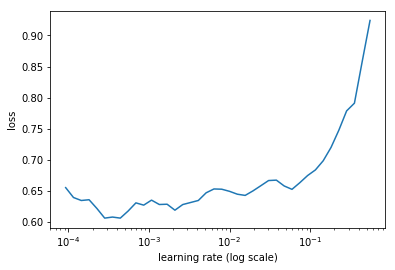

In [30]:
learn.sched.plot()

In [31]:
learn.fit(1e-4, 2, cycle_len=1, cycle_mult=2)

 24%|██▍       | 15/62 [00:08<00:26,  1.78it/s, loss=0.607]
epoch      trn_loss   val_loss   accuracy                  
    0      0.638811   0.512412   0.806513  
    1      0.650845   0.502702   0.804598                  
    2      0.619226   0.508898   0.800766                  



[array([0.5089]), 0.8007662830681637]

In [32]:
learn.save("resnet34")

In [ ]:
lr = [1e-5, 1e-4, 1e-3]

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

In [ ]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [ ]:
accuracy_np(probs, y)

In [ ]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

In [ ]:
plot_confusion_matrix(cm, data.classes)

# Conclusion

> ## Improving, but still overfitting 
> ### Though, cannot increase the dropout? 

# Prediction on new data
## From Kinect V2 camera

In [23]:
print(arch)

<function resnet34 at 0x7fc1df8b8c80>


In [24]:
data.classes

['!Person', 'Person']

In [25]:
log_preds = learn.predict()
log_preds.shape

(522, 2)

In [26]:
log_preds[:10]

array([[-0.03665, -3.32474],
       [-0.0045 , -5.40517],
       [-0.13126, -2.09548],
       [-0.0627 , -2.80062],
       [-0.00275, -5.89792],
       [-0.00498, -5.30486],
       [-0.16406, -1.88842],
       [-0.00163, -6.42147],
       [-0.04433, -3.13817],
       [-0.00201, -6.20855]], dtype=float32)

In [27]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])  

In [28]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])
        
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


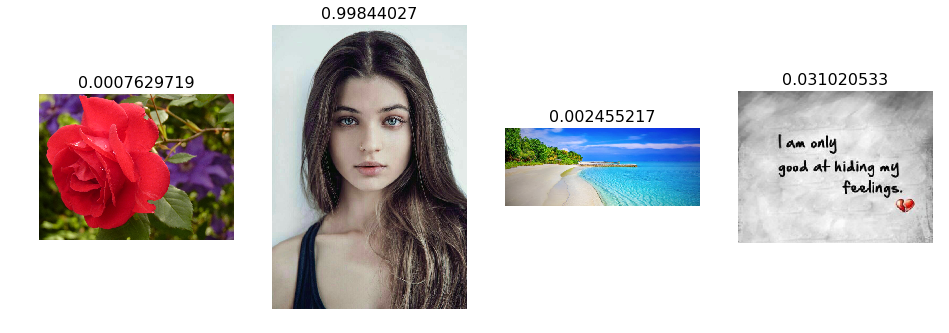

In [29]:
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


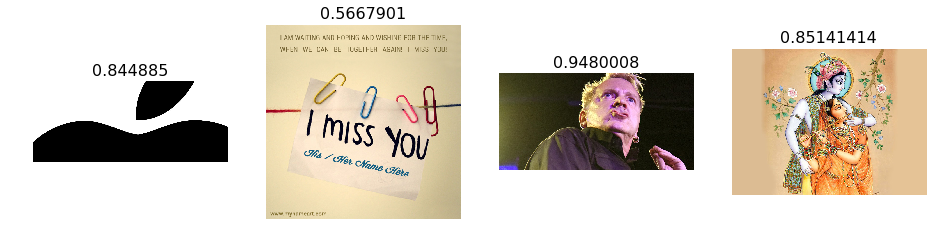

In [30]:
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [31]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct !Person


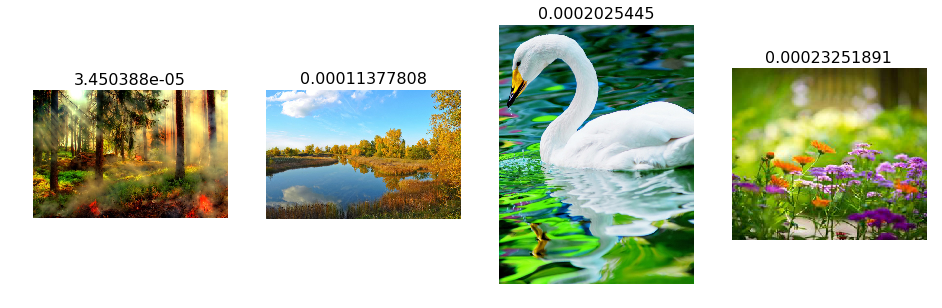

In [32]:
plot_val_with_title(most_by_correct(0, True), "Most correct !Person")

Most correct Person


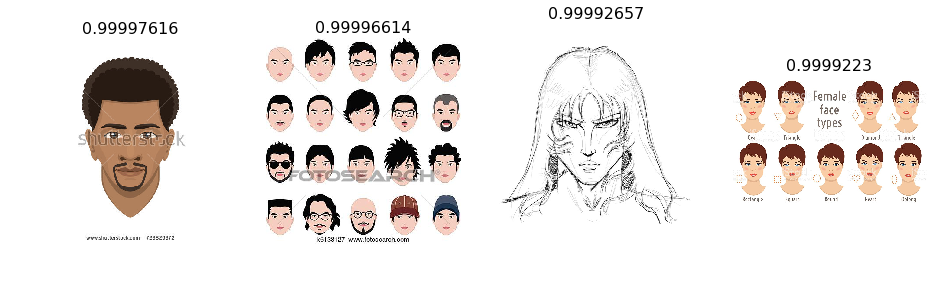

In [33]:
plot_val_with_title(most_by_correct(1, True), "Most correct Person")

Most incorrect !Person


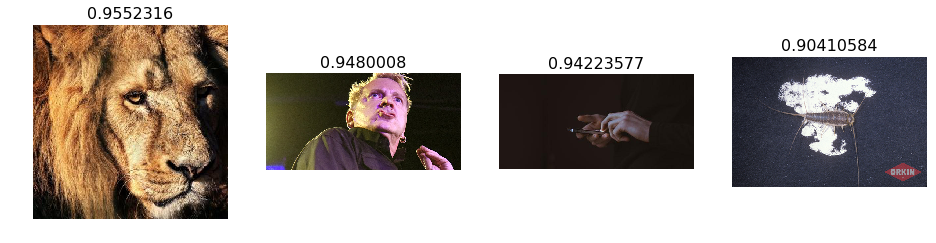

In [34]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect !Person")

Most incorrect Person


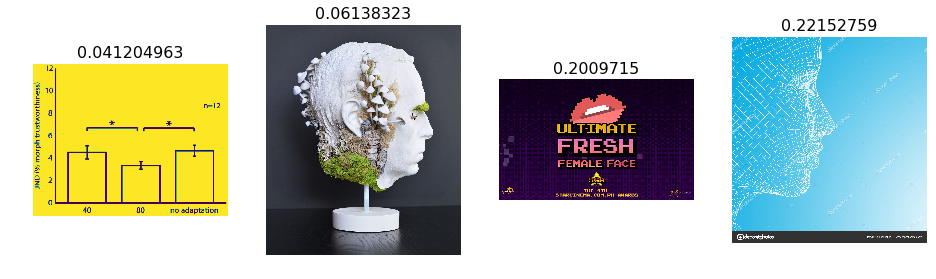

In [35]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect Person")

In [36]:
trn_tfms, val_tfms = tfms_from_model(arch, sz)

In [77]:
def from_np_arr_to_jpg(image, data):
    image_load = np.load(image)
    arr2im = Image.fromarray(image_load)
    new_img_path = image[:-4] + ".jpg"
    arr2im.save(new_img_path)

    predict_single_picture_jpg(new_img_path, data)

In [78]:
def predict_single_picture_jpg(image, data):
    image_load = open_image(image)
    im = val_tfms(np.array(image_load))
    print(im.shape)
    learn.precompute=False
    preds_log = learn.predict_array(im[None])
    preds = np.exp(preds_log)
    predict = np.argmax(preds_log)
    classes = data.classes
    print(classes[predict])

In [77]:
learn.load("/home/ros/catkin_ws/src/Various_DL/Personal_Projects/Boy_Girl_Classifying/data/models/resnet34")

In [65]:
image_path = "/home/ros/catkin_ws/src/reading_images/images/"

In [66]:
image_names = os.listdir(image_path)

In [67]:
len(image_names)

8

(3, 299, 299)
!Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
!Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person


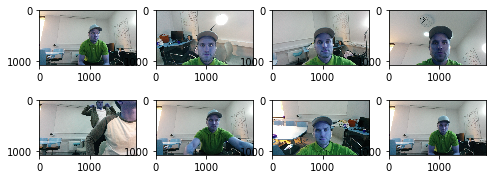

In [79]:
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
counter = 1
for image in image_names:
    img_p = image_path + image
    fig.add_subplot(rows, columns, counter)
    plt.imshow(np.load(img_p))
    predict_single_picture_np_arr(img_p, data)
    counter += 1
plt.show()

In [38]:
t_p = ("/home/ros/catkin_ws/src/Various_DL/Personal_Projects/Boy_Girl_Classifying/data/train")

In [55]:
os.listdir(t_p)

['Person', '!Person']

In [59]:
t_p_person = t_p + "/Person/"

In [60]:
f_faces = os.listdir(t_p_person)[:30]

(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person
(3, 299, 299)
Person


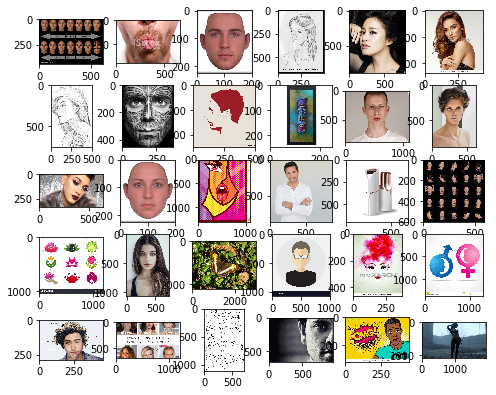

In [61]:
fig = plt.figure(figsize=(8, 8))
columns = 6
rows = 6
counter = 1
for image in f_faces:
    img_p = t_p_person + image
    fig.add_subplot(rows, columns, counter)
    plt.imshow(Image.open(img_p))
    predict_single_picture_jpg(img_p, data)
    counter += 1
plt.show()